In [10]:
import sqlite3
db=sqlite3.connect('student_database03.db')

In [11]:
cur=db.cursor()

In [14]:
cur.execute("create table student(id int primary key, name text, marks int)") 

In [15]:
cur.execute("insert into student(id,name,marks) values(1,'John',90)")
cur.execute("insert into student(id,name,marks) values(2,'Teena',100)")
cur.execute("insert into student(id,name,marks) values(3,'Andrew',70)")
cur.execute("insert into student(id,name,marks) values(4,'Dorsey',56)")
cur.execute("insert into student(id,name,marks) values(5,'David',45)")
cur.execute("insert into student(id,name,marks) values(6,'Kim',70)")
cur.execute("insert into student values(7,'Gim',71)")
cur.execute("insert into student values(8,'Jack',94)")

In [16]:
results=cur.execute("select * from student") # '*' selects all the columns

for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teena', 100)
(3, 'Andrew', 70)
(4, 'Dorsey', 56)
(5, 'David', 45)
(6, 'Kim', 70)
(7, 'Gim', 71)
(8, 'Jack', 94)


UPDATE record

In [ ]:
#changes data in an already existing row.

In [18]:
cur.execute("update student set marks=81 where id=4") #student is the table name

In [19]:
results=cur.execute("select * from student") 

for row in results:
    print(row)

(1, 'John', 90)
(2, 'Teena', 100)
(3, 'Andrew', 70)
(4, 'Dorsey', 81)
(5, 'David', 45)
(6, 'Kim', 70)
(7, 'Gim', 71)
(8, 'Jack', 94)


In [20]:
#marks of dorsey has changed from 56 to 81 permanently.

In [21]:
#multipe record update
cur.execute("update student set marks=92 where id in(1,2)")

In [22]:
results=cur.execute("select * from student") 

for row in results:
    print(row)

(1, 'John', 92)
(2, 'Teena', 92)
(3, 'Andrew', 70)
(4, 'Dorsey', 81)
(5, 'David', 45)
(6, 'Kim', 70)
(7, 'Gim', 71)
(8, 'Jack', 94)


# Delete any unwanted records

In [23]:
cur.execute("delete from student where id=6")

In [24]:
results=cur.execute("select * from student") 

for row in results:
    print(row)

(1, 'John', 92)
(2, 'Teena', 92)
(3, 'Andrew', 70)
(4, 'Dorsey', 81)
(5, 'David', 45)
(7, 'Gim', 71)
(8, 'Jack', 94)


# DROP table student

In [25]:
cur.execute('drop table student')

In [26]:
results=cur.execute("select * from student") 

for row in results:
    print(row)

OperationalError: no such table: student

In [27]:
#observation----> Table no longer exists.

In [28]:
db.close()  #closing the database

# Adding data in table with csv(comma separated values) directly

In [29]:
import sqlite3

In [31]:
db=sqlite3.connect("E:/Python/scores_database.db")
cursor=db.cursor()  #Declare cursor

In [32]:
#Create table
cursor.execute("Create table scores(gender text, student_id INT PRIMARY KEY,marks INT)")

In [54]:
#Insert records into table(single record inderting)
cursor.execute("insert into scores(gender,student_id,marks) values('Male',100,66)")

db.commit()             #save the data permanently

In [47]:
cursor.execute("delete from scores where student_id=100")

In [48]:
db.commit()

# Inserting records from csv file

In [34]:
#first we will be importing the csv file.
#Then we will insert the data into the table scores inside the database scores_database.db.

In [51]:
with open('scores_file.csv','r') as file:   #scores_file.csv is present in Home page
    total_records=0
    for row in file:                                                     #initiating a for loop
        cursor.execute("insert into scores values(?,?,?)",row.split(",")) #'scores' is the table name.
        db.commit()                                                       # 3'?' correspond to 3 columns
        total_records+=1
print(total_records,"Records inserted")

IntegrityError: UNIQUE constraint failed: scores.student_id

In [55]:
result=cursor.execute("select * from scores")
for row in result:
    print(row)

('Male', 101, 45)
('Male', 105, 78)
('Female', 106, 36)
('Male', 107, 36)
('Female', 108, 98)
('Male', 109, 20)
('Female', 110, 36)
('Male', 111, 56)
('Male', 112, 89)
('Female', 114, 63)
('Male', 115, 32)
('Male', 117, 58)
('Female', 119, 23)
('Male', 100, 66)


In [57]:
result=cursor.execute('select * from scores order by marks desc')
for row in result:
    print (row)

('Female', 108, 98)
('Male', 112, 89)
('Male', 105, 78)
('Male', 100, 66)
('Female', 114, 63)
('Male', 117, 58)
('Male', 111, 56)
('Male', 101, 45)
('Female', 106, 36)
('Male', 107, 36)
('Female', 110, 36)
('Male', 115, 32)
('Female', 119, 23)
('Male', 109, 20)


In [58]:
result=cursor.execute('select * from scores order by student_id') #acsending by default
for row in result:
    print(row)

('Male', 100, 66)
('Male', 101, 45)
('Male', 105, 78)
('Female', 106, 36)
('Male', 107, 36)
('Female', 108, 98)
('Male', 109, 20)
('Female', 110, 36)
('Male', 111, 56)
('Male', 112, 89)
('Female', 114, 63)
('Male', 115, 32)
('Male', 117, 58)
('Female', 119, 23)


In [59]:
#single record update
cursor.execute("update scores set marks=50 where student_id=107")

In [60]:
result=cursor.execute('select * from scores ') #acsending by default
for row in result:
    print(row)

('Male', 101, 45)
('Male', 105, 78)
('Female', 106, 36)
('Male', 107, 50)
('Female', 108, 98)
('Male', 109, 20)
('Female', 110, 36)
('Male', 111, 56)
('Male', 112, 89)
('Female', 114, 63)
('Male', 115, 32)
('Male', 117, 58)
('Female', 119, 23)
('Male', 100, 66)


In [61]:
#min
result=cursor.execute('select min(marks) from scores')
result.fetchone()

(20,)

In [62]:
#max
result=cursor.execute('select max(marks) from scores')
result.fetchone()

(98,)

In [63]:
db.close()

# Practice sql

In [70]:
import sqlite3

In [71]:
db=sqlite3.connect("E:/Python/sports_database.db")

In [72]:
cur=db.cursor()

In [73]:
cur.execute("create table sport(id int primary key,sportname text unique,dateofevent date,country text not null)")
#The sportname must be unique in every column
#The country name should not be null
#dateofevent should be of 'date' datatype

In [75]:
cur.execute("insert into sport values(1,'Cricket','2021-11-9','England')")

In [76]:
#we cannot enter same sports name again, because sports name must be unique.
cur.execute("insert into sport values(2,'Cricket','2021-11-11','England')")

IntegrityError: UNIQUE constraint failed: sport.sportname

In [77]:
cur.execute("insert into sport values(2,'Tennis','2018-08-02','Sri_Lanka')")
print(cur.rowcount,"record(s) inserted")

1 record(s) inserted


In [78]:
results=cur.execute("select * from sport")
results.fetchall()

[(1, 'Cricket', '2021-11-9', 'England'),
 (2, 'Tennis', '2018-08-02', 'Sri_Lanka')]

In [88]:
#Lets try to enter null value in country name
cur.execute("insert into sport values(3,'Football','2022-05-30',NULL)")
#Country name cannot be null

IntegrityError: NOT NULL constraint failed: sport.country

In [89]:
cur.execute("insert into sport values(3,'Football','2022-05-30','Australia')")

In [90]:
results=cur.execute("select * from sport")
results.fetchall()

[(1, 'Cricket', '2021-11-9', 'England'),
 (2, 'Tennis', '2018-08-02', 'Sri_Lanka'),
 (3, 'Football', '2022-05-30', 'Australia')]

# Employee database with DB and Python programmatically(by defining a function)

In [91]:
import sqlite3

In [92]:
con=sqlite3.connect("E:/Python/emp_database.db") #con is variable containing the database

In [95]:
def sql_table(con):
    cur=con.cursor()
    cur.execute("create table employees(id integer primary key, name text,salary real,department text,post text,dateofjoin date)")
    con.commit()

In [96]:
#calling function

sql_table(con)

In [97]:
cur=con.cursor()
cur.execute("insert into employees values(1,'Jack',9000,'HR','Manager0','2019-07-09')")

In [100]:
con.commit;

In [112]:
results=cur.execute("select * from employees")
results.fetchall()

[(1, 'Jack', 9000.0, 'HR', 'Manager0', '2019-07-09')]

In [108]:
def sql_insert(con,entities):  #con,entities are the arguments. con is the variable containing the database.
    cur=con.cursor()
    cur.execute('insert into employees(id,name,salary,department,post,dateofjoin) values(?,?,?,?,?,?)',entities)

In [113]:
#calling the function with the entities.
sql_insert(con,(2,'Andrew',7000,'IT','Engineer','2015-04-06'))

In [114]:
results=cur.execute("select * from employees")
results.fetchall()

[(1, 'Jack', 9000.0, 'HR', 'Manager0', '2019-07-09'),
 (2, 'Andrew', 7000.0, 'IT', 'Engineer', '2015-04-06')]

In [115]:
#calling sql again to insert the data
sql_insert(con,(3,'Thomas',6000,'HR','Manager','2016-06-14'))

In [116]:
results=cur.execute("select * from employees")
results.fetchall()

[(1, 'Jack', 9000.0, 'HR', 'Manager0', '2019-07-09'),
 (2, 'Andrew', 7000.0, 'IT', 'Engineer', '2015-04-06'),
 (3, 'Thomas', 6000.0, 'HR', 'Manager', '2016-06-14')]

In [117]:
sql_insert(con,(4,'Rudolf',8000,'IT','Engineer','2012-08-23'))
sql_insert(con,(5,'Suzen',10000,'Sales','Sales Executive','2018-02-19'))

In [118]:
results=cur.execute("select * from employees")
results.fetchall()

[(1, 'Jack', 9000.0, 'HR', 'Manager0', '2019-07-09'),
 (2, 'Andrew', 7000.0, 'IT', 'Engineer', '2015-04-06'),
 (3, 'Thomas', 6000.0, 'HR', 'Manager', '2016-06-14'),
 (4, 'Rudolf', 8000.0, 'IT', 'Engineer', '2012-08-23'),
 (5, 'Suzen', 10000.0, 'Sales', 'Sales Executive', '2018-02-19')]

In [120]:
results=cur.execute('select id,name from employees')
for i in results:
    print(i)

(1, 'Jack')
(2, 'Andrew')
(3, 'Thomas')
(4, 'Rudolf')
(5, 'Suzen')


In [122]:
results=cur.execute('select id,name from employees where salary>8000')
results.fetchall()

[(1, 'Jack'), (5, 'Suzen')]

In [124]:
results=cur.execute('select min(salary) from employees ')
results.fetchall()

[(6000.0,)]

In [123]:
results=cur.execute('select min(salary) from employees where salary>8000')
results.fetchall()

[(9000.0,)]

In [125]:
#find the number of rows in the table
results=cur.execute('select count(id) from employees')
results.fetchall()

[(5,)]

In [126]:
#Find the distinct datas present in a particular column.
results=cur.execute("select distinct(department) from employees")
results.fetchall()

[('HR',), ('IT',), ('Sales',)]

In [127]:
#Count the distinct datas present in a particular column.
results=cur.execute("select count(distinct(department)) from employees")
results.fetchall()

[(3,)]

In [128]:
#Find the sum of salaries for a particular department
results=cur.execute("select sum(salary),post from employees group by post") #sum(salary),post are the columns to be shown
results.fetchall()

[(15000.0, 'Engineer'),
 (6000.0, 'Manager'),
 (9000.0, 'Manager0'),
 (10000.0, 'Sales Executive')]

In [129]:
#Find the distinct datas present in a particular column.
results=cur.execute("select sum(salary),department from employees group by post") #sum(salary),department are the columns to be shown
results.fetchall()

[(15000.0, 'IT'), (6000.0, 'HR'), (9000.0, 'HR'), (10000.0, 'Sales')]

In [130]:
def sql_query(sql):
    cur=con.cursor()
    results=cur.execute(sql)
    return results         #return keyword is used so that we can store the outputs in a variable.

In [131]:
#calling the function and passing query into it
responds=sql_query("select * from employees") #Here we are storing the output of the function in 'responds' variable.
responds.fetchall()

[(1, 'Jack', 9000.0, 'HR', 'Manager0', '2019-07-09'),
 (2, 'Andrew', 7000.0, 'IT', 'Engineer', '2015-04-06'),
 (3, 'Thomas', 6000.0, 'HR', 'Manager', '2016-06-14'),
 (4, 'Rudolf', 8000.0, 'IT', 'Engineer', '2012-08-23'),
 (5, 'Suzen', 10000.0, 'Sales', 'Sales Executive', '2018-02-19')]

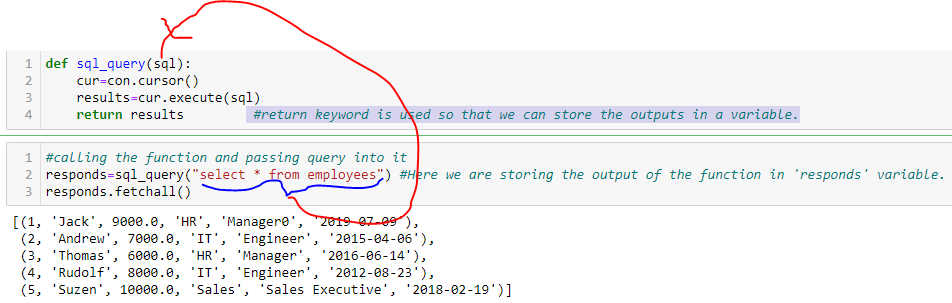